In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import  train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score


from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 파일불러오기

In [3]:
data= pd.read_csv("pump_train_model_set.csv")

In [4]:
data

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,8.699681,23,1390,46,34.938093,-9.856322e+00,2,16,4.700480,1,...,0,1999,9,10,3,6,1,5,6,2
1,0.000000,65,1399,46,34.698766,-2.147466e+00,0,7,5.638355,2,...,1,2010,9,6,5,6,4,1,6,2
2,3.258097,65,686,7,37.460664,-3.821329e+00,8,19,5.525453,1,...,1,2009,9,10,2,6,1,6,4,2
3,0.000000,4,263,5,38.486161,-1.115530e+01,6,13,4.077537,1,...,1,1986,5,10,5,6,3,7,4,1
4,0.000000,65,0,12,31.130847,-1.825359e+00,0,4,0.000000,1,...,1,1990,9,4,5,6,2,1,6,2
5,3.044522,32,0,68,39.172796,-4.765587e+00,8,11,0.693147,1,...,1,2009,5,10,2,2,1,2,4,2
6,0.000000,50,0,18,33.362410,-3.766365e+00,7,14,0.000000,1,...,1,1990,11,10,5,6,1,7,3,1
7,0.000000,63,0,68,32.620617,-4.226198e+00,1,14,0.000000,1,...,1,1990,15,6,6,5,1,4,3,1
8,0.000000,55,0,46,32.711100,-5.146712e+00,1,12,0.000000,1,...,1,1990,14,10,5,2,2,7,3,1
9,0.000000,65,0,12,30.626991,-1.257051e+00,0,4,0.000000,1,...,1,1990,15,10,5,6,1,4,3,2


## target, features 지정 

In [60]:
y=data['status_group']

In [61]:
x=data.drop(['status_group'],axis=1)

## validation을 위해 데이터 splitting

In [9]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,random_state=2)

In [10]:
ytrain = np.ravel(ytrain)

### "Accuracy 확인 방법"
1. 내장함수 score() 이용. (xtest, ytest)가 parameter / 아니면 accuracy_score(ytest, y 예측값)
2. cross_val_score

# Decision Tree

In [11]:
tree1 = tree.DecisionTreeClassifier()

In [12]:
tree1= tree1.fit(xtrain, ytrain)

In [16]:
treeimportance = tree1.feature_importances_

In [34]:
plt.bar(range(len(treeimportance)),treeimportance, color = "lightgrey")


<Container object of 20 artists>

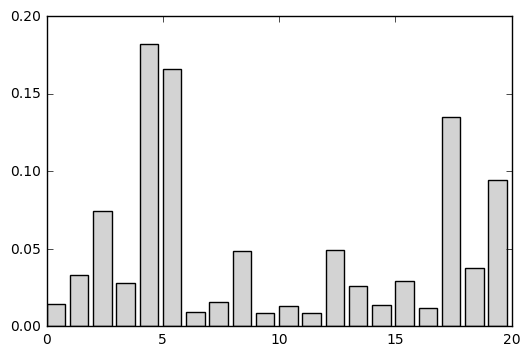

In [35]:
plt.show()

longitude, latitude, quantity, waterpoint_type , gps_height 순 

In [31]:
data.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,8.699681,23,1390,46,34.938093,-9.856322,2,16,4.700480,1,...,0,1999,9,10,3,6,1,5,6,2
1,0.000000,65,1399,46,34.698766,-2.147466,0,7,5.638355,2,...,1,2010,9,6,5,6,4,1,6,2
2,3.258097,65,686,7,37.460664,-3.821329,8,19,5.525453,1,...,1,2009,9,10,2,6,1,6,4,2
3,0.000000,4,263,5,38.486161,-11.155298,6,13,4.077537,1,...,1,1986,5,10,5,6,3,7,4,1
4,0.000000,65,0,12,31.130847,-1.825359,0,4,0.000000,1,...,1,1990,9,4,5,6,2,1,6,2


In [11]:
tree1.score(xtest, ytest)

0.74868686868686873

In [15]:
from sklearn.tree import export_graphviz


export_graphviz(tree1, out_file="tree1.dot")

# Random Forest

### 모델만들기

In [36]:
forest1 = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=1)

In [37]:
forest1.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [38]:
forest1.score(xtest, ytest)

0.76498316498316499

In [39]:
ypred_test=forest1.predict(xtest)
accuracy_score(ytest, ypred_test)

0.76498316498316499

In [40]:
forest2 = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=200, random_state=1)
forest2.fit(xtrain, ytrain)
forest2.score(xtest, ytest)

0.76417508417508417

In [41]:
forest3 = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=300, random_state=1)
forest3.fit(xtrain, ytrain)
forest3.score(xtest, ytest)

0.76377104377104377

In [42]:
forest4 = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=400, random_state=1)
forest4.fit(xtrain, ytrain)
forest4.score(xtest, ytest)

0.76410774410774407

In [43]:
forest5 = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=500, random_state=1)
forest5.fit(xtrain, ytrain)
forest5.score(xtest, ytest)

0.76430976430976427

In [44]:
score =cross_val_score(forest1, x, y)
score.mean()

0.76590909090909098

In [52]:
importance=forest1.feature_importances_

In [53]:
importance = pd.DataFrame(importance, index=xtrain.columns, 
                          columns=["Importance"])

In [54]:
importance

,Importance
amount_tsh,0.048332
funder,0.032560
gps_height,0.034160
installer,0.023157
longitude,0.063976
latitude,0.064239
basin,0.021961
region,0.032667
population,0.026599
public_meeting,0.007652


In [55]:
importance["Std"] = np.std([tree.feature_importances_
                            for tree in forest1.estimators_], axis=0)

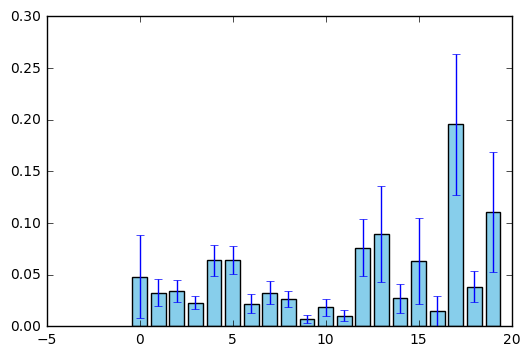

In [56]:
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center",color="skyblue")

plt.show()

quantity, waterpoint_type, extraction_type, construction_year

In [57]:
data.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,8.699681,23,1390,46,34.938093,-9.856322,2,16,4.700480,1,...,0,1999,9,10,3,6,1,5,6,2
1,0.000000,65,1399,46,34.698766,-2.147466,0,7,5.638355,2,...,1,2010,9,6,5,6,4,1,6,2
2,3.258097,65,686,7,37.460664,-3.821329,8,19,5.525453,1,...,1,2009,9,10,2,6,1,6,4,2
3,0.000000,4,263,5,38.486161,-11.155298,6,13,4.077537,1,...,1,1986,5,10,5,6,3,7,4,1
4,0.000000,65,0,12,31.130847,-1.825359,0,4,0.000000,1,...,1,1990,9,4,5,6,2,1,6,2


# Gradient Boosting

In [58]:
params = {'n_estimators': 100, 'max_depth': 6,
        'learning_rate': 0.1}

gbc1 = GradientBoostingClassifier(**params).fit(xtrain, ytrain)

gbc1.score(xtest,ytest)

0.78370370370370368

In [62]:
params = {'n_estimators': 200, 'max_depth': 6,
        'learning_rate': 0.1}

gbc2 = GradientBoostingClassifier(**params).fit(xtrain, ytrain)

gbc2.score(xtest,ytest)

0.79030303030303028

In [63]:
score =cross_val_score(gbc2, x, y)
score.mean()

0.79343434343434349

In [65]:
params = {'n_estimators': 300, 'max_depth': 6,
        'learning_rate': 0.1}

gbc3 = GradientBoostingClassifier(**params).fit(xtrain, ytrain)

gbc3.score(xtest,ytest)

0.79892255892255892

In [66]:
params = {'n_estimators': 400, 'max_depth': 6,
        'learning_rate': 0.1}

gbc4 = GradientBoostingClassifier(**params).fit(xtrain, ytrain)

gbc4.score(xtest,ytest)

0.79966329966329963

In [64]:
params = {'n_estimators': 500, 'max_depth': 6,
        'learning_rate': 0.1}

gbc5 = GradientBoostingClassifier(**params).fit(xtrain, ytrain)

gbc5.score(xtest,ytest)

0.80080808080808086

In [73]:
gbcimportance=gbc5.feature_importances_

In [75]:
gbcimportance = pd.DataFrame(gbcimportance, index=xtrain.columns, 
                          columns=["Importance"])

In [79]:
gbcimportance

,Importance
amount_tsh,0.021101
funder,0.039095
gps_height,0.095508
installer,0.033726
longitude,0.254154
latitude,0.231546
basin,0.012287
region,0.020168
population,0.057850
public_meeting,0.008555


# Adaboost Classifer

In [11]:
abc1= AdaBoostClassifier(n_estimators=100)

scores = cross_val_score(abc1, x,y)

scores

array([ 0.73227273,  0.72878788,  0.73060606])

In [22]:
abc3= AdaBoostClassifier(n_estimators=300)

abc3.fit(xtrain, ytrain)

abc3.score(xtest, ytest)

0.73575757575757572

In [21]:
abc5= AdaBoostClassifier(n_estimators=500)

abc5.fit(xtrain, ytrain)

abc5.score(xtest, ytest)

0.73744107744107745

# testset prediction

In [35]:
real_test = pd.read_csv("pump_test_model_set.csv")

In [36]:
submitFormat = pd.read_csv("SubmissionFormat.csv")

In [37]:
real_test.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
0,0.0,24,1996,18,35.290799,-4.059696,4,15,321,1,6,1,2012,16,3,6,3,4,5,7
1,0.0,4,1569,5,36.656709,-3.309214,0,8,300,1,3,1,2000,10,10,6,3,0,8,2
2,0.0,19,1567,3,34.767863,-5.004344,4,0,500,1,3,2,2010,16,10,6,3,0,5,7
3,0.0,24,267,18,38.058046,-9.418672,5,16,250,2,3,1,1987,16,10,0,3,5,7,7
4,500.0,24,1260,18,35.006123,-10.950412,5,13,60,2,0,1,2000,10,7,3,3,1,8,2


In [38]:
prediction = forest3.predict(real_test)

In [39]:
submission = pd.DataFrame({
"id": submitFormat["id"],
"status_group": prediction
})

In [40]:
 vals_to_replace = {2:'functional', 0:'functional needs repair',
                           1:'non functional'}
    
submission.status_group = submission.status_group.replace(vals_to_replace)   

In [41]:
submission.head()

,id,status_group
0,50785,functional
1,51630,functional needs repair
2,17168,functional
3,45559,functional
4,49871,functional needs repair


In [42]:
 submission.to_csv('water_forest3.csv', index=False)